# Supervised Learning

## T0.
(a) Import Data


In [79]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.linalg import inv, det

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KernelDensity         #T3
from sklearn.naive_bayes import GaussianNB          #T4
from sklearn.linear_model import LogisticRegression #T5
from sklearn.model_selection import RepeatedStratifiedKFold
from statistics import mean



In [2]:
df = pd.read_csv('ds03.csv')
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,class
0,0.721,0.746,6.0,-4.247,0.0,0.0317,0.0114,0.0952,0.0844,0.7050,124.968,206467.0,0
1,0.677,0.582,7.0,-8.628,1.0,0.1510,0.0089,0.0000,0.0861,0.5130,170.026,272048.0,0
2,0.736,0.308,4.0,-7.830,1.0,0.0677,0.9460,0.0000,0.1860,0.3610,111.202,220492.0,0
3,0.674,0.506,6.0,-10.532,1.0,0.0434,0.1730,0.0000,0.0866,0.1830,145.965,259333.0,0
4,0.631,0.790,1.0,-3.807,1.0,0.2730,0.7010,0.0000,0.0947,0.7290,195.919,191613.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.857,0.621,9.0,-6.376,0.0,0.0824,0.1480,0.0000,0.0865,0.6680,97.986,204467.0,1
500,0.843,0.391,2.0,-7.899,1.0,0.0845,0.1810,0.0000,0.1370,0.4960,129.972,160627.0,1
501,0.654,0.630,10.0,-4.644,1.0,0.0259,0.1530,0.0000,0.1110,0.4300,89.991,167693.0,1
502,0.505,0.340,4.0,-9.005,1.0,0.0438,0.5760,0.0000,0.2100,0.0916,101.993,206459.0,1


(b) Normalize the dataset

In [3]:
#Case A
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
dfA = pd.DataFrame(scaler.transform(df),columns=df.columns)
dfA['class'] = df['class']
dfA

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,class
0,0.693727,0.702864,0.545455,0.904213,0.0,0.009645,0.012051,0.102586,0.062887,0.717538,0.429546,0.280312,0
1,0.639606,0.507160,0.636364,0.739581,1.0,0.169457,0.009408,0.000000,0.064672,0.511331,0.739223,0.442325,0
2,0.712177,0.180191,0.363636,0.769569,1.0,0.057870,1.000000,0.000000,0.169554,0.348083,0.334935,0.314960,0
3,0.635916,0.416468,0.545455,0.668032,1.0,0.025318,0.182875,0.000000,0.065197,0.156911,0.573856,0.410914,0
4,0.583026,0.755370,0.090909,0.920747,1.0,0.332887,0.741015,0.000000,0.073701,0.743314,0.917182,0.243616,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.861009,0.553699,0.818182,0.824208,0.0,0.077562,0.156448,0.000000,0.065092,0.677800,0.244103,0.275371,1
500,0.843788,0.279236,0.181818,0.766976,1.0,0.080375,0.191332,0.000000,0.118110,0.493073,0.463938,0.167068,1
501,0.611316,0.564439,0.909091,0.889294,1.0,0.001875,0.161734,0.000000,0.090814,0.422189,0.189155,0.184524,1
502,0.428044,0.218377,0.363636,0.725414,1.0,0.025854,0.608879,0.000000,0.194751,0.058748,0.271643,0.280292,1


In [4]:
#Case B
pca = PCA(n_components = 2)
dfB = pca.fit(df).transform(df)
columns = ['Feature1','Feature2']
dfB = pd.DataFrame(dfB, columns=columns)
scaler.fit(dfB)
dfB = pd.DataFrame(scaler.transform(dfB),columns=dfB.columns)
dfB['class'] = df['class']
dfB

,Feature1,Feature2,class
0,0.280312,0.433221,0
1,0.442325,0.735883,0
2,0.314960,0.337445,0
3,0.410914,0.572091,0
4,0.243616,0.922023,0
...,...,...,...
499,0.275371,0.248099,1
500,0.167068,0.472509,1
501,0.184524,0.196881,1
502,0.280292,0.275691,1


## T1. (Only for case B)

In [5]:
def calculateCoeff(covMatrix, u, c):
    
    detcovMatrix = np.linalg.det(covMatrix)

    A = -(covMatrix[1,1])/(2*detcovMatrix)
    B = -(covMatrix[0,0])/(2*detcovMatrix)
    C = covMatrix[0,1]/detcovMatrix
    D = ((u[0]*covMatrix[1,1])-(u[1]*covMatrix[0,1]))/detcovMatrix
    E = ((u[1]*covMatrix[0,0])-(u[0]*covMatrix[0,1]))/detcovMatrix
    F = -(((u[0]**2)*covMatrix[1,1])+((u[1]**2)*covMatrix[0,0])-(2*u[0]*u[1]*covMatrix[0,1]))/(2*detcovMatrix) + c

    return A, B, C, D, E, F

In [6]:
# Dividir los datos en conjuntos de entrenamiento y prueba
dfB_Train, dfB_Test = train_test_split(dfB, test_size=0.3, random_state=100)

# Separamos las clases 
dfBW0 = dfB_Train[dfB_Train['class'] == 0].drop('class', axis=1)
dfBW1 = dfB_Train[dfB_Train['class'] == 1].drop('class', axis=1)

# Calculamos la media de cada caracteristica de cada clase
meanW0 = np.array([dfBW0['Feature1'].mean() , dfBW0['Feature2'].mean()])
meanW1 = np.array([dfBW1['Feature1'].mean() , dfBW1['Feature2'].mean()])

# Calcular la media y la matriz de covarianza para cada clase
covMatrixW0 = np.cov(dfBW0, rowvar=False)
covMatrixW1 = np.cov(dfBW1, rowvar=False)


#CREAMOS LA FUNCION DISCRIMINANTE
prior = 0.5  # Clases equiprobables
c0 = - 0.5 * np.log(det(covMatrixW0)) - np.log(2*math.pi)
c1 = - 0.5 * np.log(det(covMatrixW1)) - np.log(2*math.pi)

# Calculamos las predicciones de cada una de las variables de Test

X = np.array(dfB_Test[['Feature1', 'Feature2']])
y = np.array(dfB_Test['class'])
predictions = []

for i in range(len(X)):
    g0 = -0.5 * X[i].T @ inv(covMatrixW0) @ X[i] + 0.5 * X[i].T @ inv(covMatrixW0) @ meanW0 + 0.5 * meanW0.T @ inv(covMatrixW0) @ X[i] - 0.5 * meanW0.T @ inv(covMatrixW0) @ meanW0 + np.log(prior) + c0
    g1 = -0.5 * X[i].T @ inv(covMatrixW1) @ X[i] + 0.5 * X[i].T @ inv(covMatrixW1) @ meanW1 + 0.5 * meanW1.T @ inv(covMatrixW1) @ X[i] - 0.5 * meanW1.T @ inv(covMatrixW1) @ meanW1 + np.log(prior) + c1

    if g0 > g1:
        predictions.append(0)
    else:
        predictions.append(1)


# Para obtener la formula 
A0, B0, C0, D0, E0, F0 = calculateCoeff(covMatrixW0,meanW0, c0)

print('Formula W0: ',A0.round(2),'x1^2  + ',B0.round(2),'x2^2  + ',C0.round(2),'x1x2  + ',D0.round(2),'x1  + ',E0.round(2),'x2  + ',F0.round(2))

    # Obtenemos los valores de: 
A1, B1, C1, D1, E1, F1 = calculateCoeff(covMatrixW1, meanW1, c1)

print('Formula W1: ',A1.round(2),'x1^2  + ',B1.round(2),'x2^2  + ',C1.round(2),'x1x2  + ',D1.round(2),'x1  + ',E1.round(2),'x2  + ',F1.round(2))
#Calculamos la precision del modelo
accuracy = accuracy_score(y, predictions)
print('Exactitud: (Accuracy):', (accuracy*100).round(2),'%')

Formula W0:  -23.44 x1^2  +  -14.86 x2^2  +  -3.98 x1x2  +  17.13 x1  +  13.03 x2  +  -3.63
Formula W1:  -83.27 x1^2  +  -15.98 x2^2  +  13.8 x1x2  +  37.14 x1  +  9.31 x2  +  -4.2
Exactitud: (Accuracy): 73.03 %


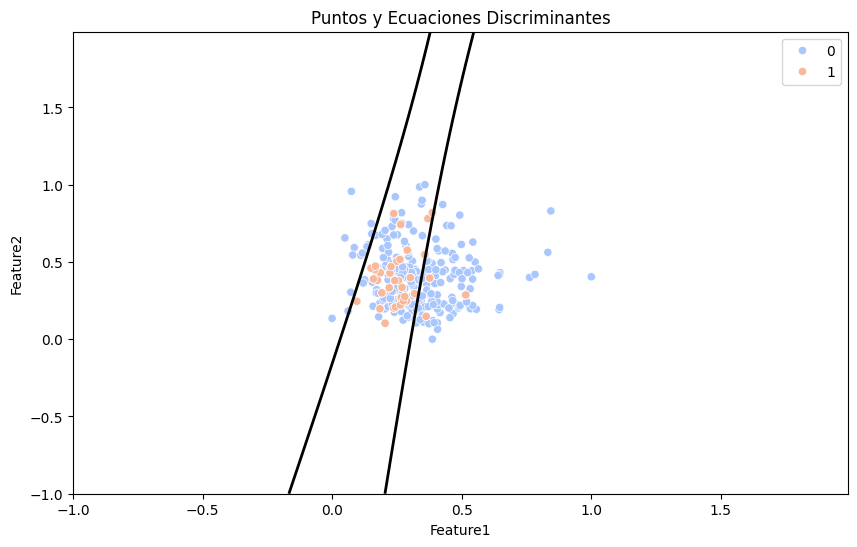

In [7]:
# Supongamos que ya has realizado la división y el cálculo de las medias y covarianzas

# Crea una malla de puntos para la visualización
x_min, x_max = dfB['Feature1'].min() - 1, dfB['Feature1'].max() + 1
y_min, y_max = dfB['Feature2'].min() - 1, dfB['Feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Calcula las funciones discriminantes para cada punto en la malla
Z0 = np.zeros_like(xx)
Z1 = np.zeros_like(xx)

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([xx[i, j], yy[i, j]])
        g0 = -0.5 * point.T @ inv(covMatrixW0) @ point + 0.5 * point.T @ inv(covMatrixW0) @ meanW0 + 0.5 * meanW0.T @ inv(covMatrixW0) @ point - 0.5 * meanW0.T @ inv(covMatrixW0) @ meanW0 + np.log(prior) + c0
        g1 = -0.5 * point.T @ inv(covMatrixW1) @ point + 0.5 * point.T @ inv(covMatrixW1) @ meanW1 + 0.5 * meanW1.T @ inv(covMatrixW1) @ point - 0.5 * meanW1.T @ inv(covMatrixW1) @ meanW1 + np.log(prior) + c1
        Z0[i, j] = g0
        Z1[i, j] = g1

# Grafica los puntos y las regiones de decisión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='class', data=dfB, palette='coolwarm', legend='full')
plt.contour(xx, yy, Z0-Z1, levels=[0], linewidths=2, colors='black')  # Línea de decisión

plt.title('Puntos y Ecuaciones Discriminantes')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper right')
plt.show()


## T2. (Only for case B)

In [20]:

#Calculamos una sola matriz para todas las clases
covMatrix2Class = np.cov(dfB_Train.drop('class', axis=1), rowvar=False)

#CREAMOS LA FUNCION DISCRIMINANTE
prior = 0.5  # Clases equiprobables
c = - 0.5 * np.log(det(covMatrix2Class)) - np.log(2*math.pi)

# Calculamos las predicciones de cada una de las variables de Test

X = np.array(dfB_Test[['Feature1', 'Feature2']])
y = np.array(dfB_Test['class'])
predictions = []

for i in range(len(X)):
    g0 = -0.5 * X[i].T @ inv(covMatrix2Class) @ X[i] + 0.5 * X[i].T @ inv(covMatrix2Class) @ meanW0 + 0.5 * meanW0.T @ inv(covMatrix2Class) @ X[i] - 0.5 * meanW0.T @ inv(covMatrix2Class) @ meanW0 + np.log(prior) + c
    g1 = -0.5 * X[i].T @ inv(covMatrix2Class) @ X[i] + 0.5 * X[i].T @ inv(covMatrix2Class) @ meanW1 + 0.5 * meanW1.T @ inv(covMatrix2Class) @ X[i] - 0.5 * meanW1.T @ inv(covMatrix2Class) @ meanW1 + np.log(prior) + c

    if g0 > g1:
        predictions.append(0)
    else:
        predictions.append(1)


# Para obtener la formula 
    #Sacamos el determinante de la matriz 
detcovMatrix = np.linalg.det(covMatrix2Class)

    # Obtenemos los valores de: 
A0, B0, C0, D0, E0, F0 = calculateCoeff(covMatrix2Class,meanW0, c)

print('Formula W0: ',D0.round(2),'x1  + ',E0.round(2),'x2  + ',F0.round(2))

    # Obtenemos los valores de: 
A1, B1, C1, D1, E1, F1 = calculateCoeff(covMatrix2Class,meanW1, c)

print('Formula W1: ',D1.round(2),'x1  + ',E1.round(2),'x2  + ',F1.round(2))



#Calculamos la precision del modelo
accuracy = accuracy_score(y, predictions)
print('Exactitud (Accuracy):', (accuracy*100).round(2),'%')




Formula W0:  21.8 x1  +  12.06 x2  +  -4.04
Formula W1:  16.88 x1  +  12.26 x2  +  -2.68
Exactitud (Accuracy): 71.05 %


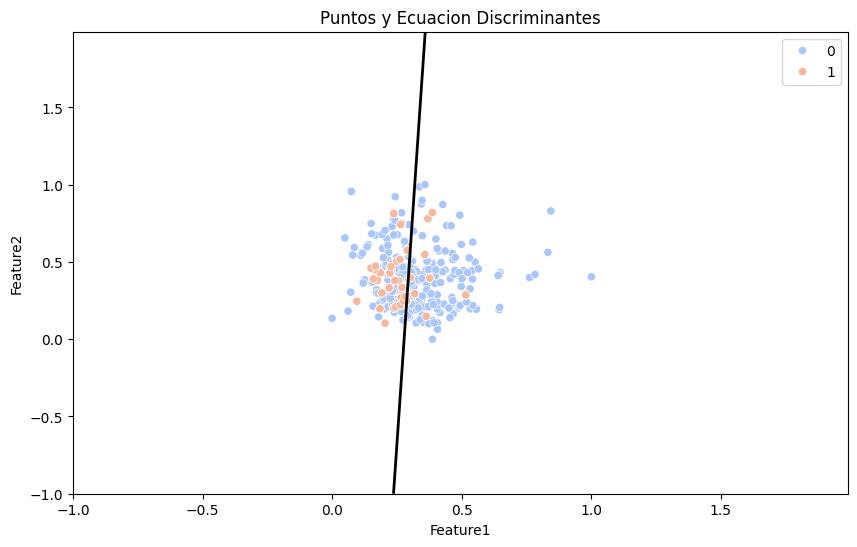

In [10]:
# Crea una malla de puntos para la visualización
x_min, x_max = dfB['Feature1'].min() - 1, dfB['Feature1'].max() + 1
y_min, y_max = dfB['Feature2'].min() - 1, dfB['Feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Calcula las funciones discriminantes para cada punto en la malla
Z0 = np.zeros_like(xx)
Z1 = np.zeros_like(xx)

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([xx[i, j], yy[i, j]])
        g0 = -0.5 * point.T @ inv(covMatrix2Class) @ point + 0.5 * point.T @ inv(covMatrix2Class) @ meanW0 + 0.5 * meanW0.T @ inv(covMatrix2Class) @ point - 0.5 * meanW0.T @ inv(covMatrix2Class) @ meanW0 + np.log(prior) + c
        g1 = -0.5 * point.T @ inv(covMatrix2Class) @ point + 0.5 * point.T @ inv(covMatrix2Class) @ meanW1 + 0.5 * meanW1.T @ inv(covMatrix2Class) @ point - 0.5 * meanW1.T @ inv(covMatrix2Class) @ meanW1 + np.log(prior) + c
        Z0[i, j] = g0
        Z1[i, j] = g1

# Grafica los puntos y las regiones de decisión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='class', data=dfB, palette='coolwarm', legend='full')
plt.contour(xx, yy, Z0-Z1, levels=[0], linewidths=2, colors='black')  # Línea de decisión

plt.title('Puntos y Ecuacion Discriminantes')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper right')
plt.show()

## T3. (Cases A and B)

In [28]:
def splitDF(dataFrame):
    x = np.array(dataFrame.drop('class',axis=1))
    y = np.array(dataFrame['class'])
    return x, y

def split_Class(df_Train,df_Test):
    # Separamos las clases 
    dfW0_Train = df_Train[df_Train['class'] == 0]
    dfW1_Train = df_Train[df_Train['class'] == 1]

    # Dividir los datos de entrenamiento en características y clases
    xW0_Train = np.array(dfW0_Train.drop('class', axis=1))
    xW1_Train = np.array(dfW1_Train.drop('class', axis=1))

    # Dividimos los datos de prueba
    x_Test, y_Test = splitDF(df_Test)

    return xW0_Train, xW1_Train, x_Test, y_Test

def calculatehN(xW0_Train,xW1_Train):
    hNW0 = 1/(math.sqrt(len(xW0_Train)))
    hNW1 = 1/(math.sqrt(len(xW1_Train)))
    return hNW0, hNW1

def calculateModelKDE(xW0_Train, xW1_Train, x_Test, y_Test, hNW0, hNW1):
    # Entrenamos el modelo para cada clase
    kdeW0 = KernelDensity(bandwidth=hNW0, kernel='gaussian').fit(xW0_Train)
    kdeW1 = KernelDensity(bandwidth=hNW1, kernel='gaussian').fit(xW1_Train)

    # Calculate log-likelihoods for test data
    logLikelihoodW0 = kdeW0.score_samples(x_Test)
    logLikelihoodW1 = kdeW1.score_samples(x_Test)

    # Calculate posterior probabilities
    probW0 = np.exp(logLikelihoodW0)
    probW1 = np.exp(logLikelihoodW1)

    # Make predictions based on the class with higher posterior probability
    predictions = (probW1 > probW0).astype(int)

    # Evaluate the performance
    accuracy = accuracy_score(y_Test, predictions)

    return accuracy

In [29]:
'''
Dividimos el dataset en clases
'''
dfB_Train, dfB_Test = train_test_split(dfB, test_size=0.3, random_state=100)
dfA_Train, dfA_Test = train_test_split(dfA, test_size=0.3, random_state=100)

xBW0_Train, xBW1_Train, xB_Test, yB_Test = split_Class(dfB_Train, dfB_Test)
xAW0_Train, xAW1_Train, xA_Test, yA_Test = split_Class(dfA_Train, dfA_Test)

hNAW0, hNAW1 = calculatehN(xAW0_Train, xAW1_Train)
hNBW0, hNBW1 = calculatehN(xBW0_Train, xBW1_Train)


'''
Entrenamos el Modelo para Caso B
'''
accuracyA = calculateModelKDE(xAW0_Train, xAW1_Train, xA_Test, yA_Test, hNAW0, hNAW1)
accuracyB = calculateModelKDE(xBW0_Train, xBW1_Train, xB_Test, yB_Test, hNBW0, hNBW1)


'''
Imprimimos los resultados
'''
print('Exactitud Caso A (Accuracy): ',(accuracyA*100).round(2),'%')
print('Exactitud Caso B (Accuracy): ',(accuracyB*100).round(2),'%')

Exactitud Caso A (Accuracy):  88.82 %
Exactitud Caso B (Accuracy):  70.39 %


## T4. (Cases A and B)

In [75]:
def calculateModel(x, y, rskf, model):
    accuracy = []
    for trainIndex, testIndex in rskf.split(x,y):
        x_Train, x_Test = x[trainIndex], x[testIndex]
        y_Train, y_Test = y[trainIndex], y[testIndex]
        # Entrenamos el modelo para cada clase
        trainModel = model.fit(x_Train, y_Train) #Usar crossvalidation

        # Make predictions based on the class with higher posterior probability
        predictions = trainModel.predict(x_Test)

        # Evaluate the performance
        accuracy.append(accuracy_score(y_Test, predictions))
    

    return accuracy

In [80]:
xA, yA = splitDF(dfA)
xB, yB = splitDF(dfB)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)
modelT4 = GaussianNB()

accuracyT4A = calculateModel(xA, yA, rskf, modelT4)
accuracyT4B = calculateModel(xB, yB, rskf, modelT4)


'''
Imprimimos los resultados
'''
print('Exactitud Caso A (Prom): ',(mean(accuracyT4A)*100).round(2),'%')
print('Desviación Estándar Caso A: ',np.std(accuracyT4A).round(5))
print('Exactitud Caso B (Prom): ',(mean(accuracyT4B)*100).round(2),'%')
print('Desviación Estándar Caso B: ',np.std(accuracyT4B).round(5))

Exactitud Caso A (Prom):  70.36 %
Desviación Estándar Caso A:  0.04307
Exactitud Caso B (Prom):  63.49 %
Desviación Estándar Caso B:  0.03986


## T5. (Cases A and B)

In [85]:
modelT5 = LogisticRegression(penalty=None)
accuracyT5A = calculateModel(xA, yA, rskf, modelT5)
accuracyT5B = calculateModel(xB, yB, rskf, modelT5)


'''
Imprimimos los resultados
'''
print('Exactitud Caso A (Prom): ',(mean(accuracyT5A)*100).round(2),'%')
print('Desviación Estándar Caso A: ',np.std(accuracyT5A).round(5))
print('Exactitud Caso B (Prom): ',(mean(accuracyT5B)*100).round(2),'%')
print('Desviación Estándar Caso B: ',np.std(accuracyT5B).round(5))


Exactitud Caso A (Prom):  75.06 %
Desviación Estándar Caso A:  0.04533
Exactitud Caso B (Prom):  66.13 %
Desviación Estándar Caso B:  0.04292
